In [2]:
#HISTOGRAMA E BLOXSPOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

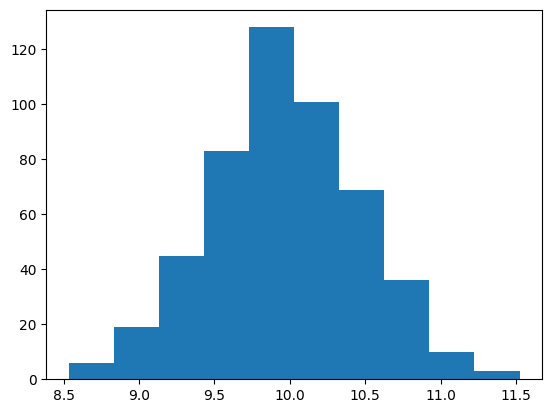

In [3]:
data = np.random.normal(10, 0.5, 500) #Desenhe amostras aleatórias de uma distribuição normal
plt.hist(data) #histograma
plt.show()

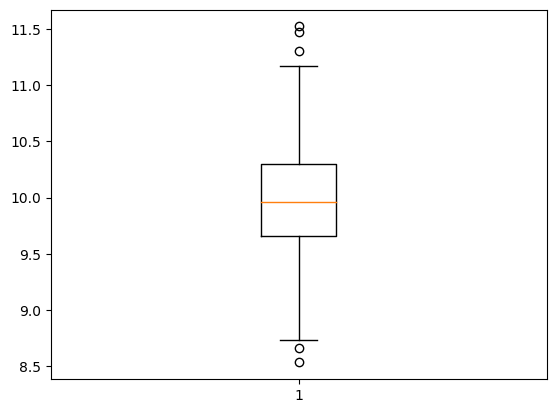

In [4]:
plt.boxplot(data); #criar grafico de caixa
#PARA FAZER  ANALISE EXPLORATORIA DOS DADOS E VERIFICAR SEM TEM OUTLINES
#o = outlines
# partidos da distribuição -----
#linha do  meio e a mediana

In [37]:
#SCATTER PLOT
# A RELAÇÃO DE DUAS VARIAVEIS
x = np.random.normal(10, 0.5, 100)
y = np.random.uniform(0, 20, 100)

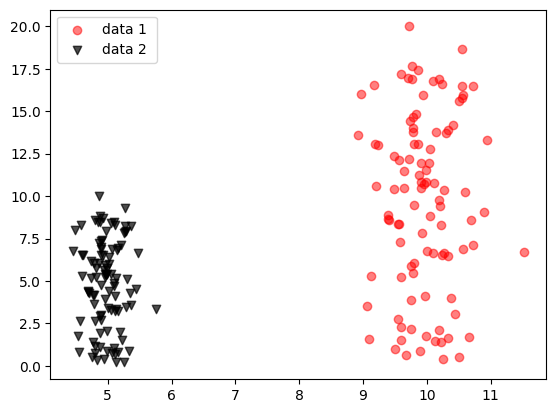

In [38]:
fig = plt.figure() #criar figura
ax = plt.axes() #criar eixo
# representações gráficas do relacionamento entre duas variáveis numéricas
ax.scatter(x, y, marker= 'o', color = 'red', label = 'data 1', alpha = 0.5)
ax.scatter(x*0.5, y*0.5, marker = 'v', color = 'black', label = 'data 2 ', alpha = 0.7)
ax.legend();

In [7]:
import plotly.express as px #importar para baixa o dataset

In [8]:
px.data.gapminder()  #nome do dataset
#dataset que mostra Paises de varios continentes
#expectativa de vida e vida per capta

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [42]:
#filtrando os dados do brasil e  retirando o ano
df = px.data.gapminder().query('country == "Brazil"').set_index("year") 

In [43]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


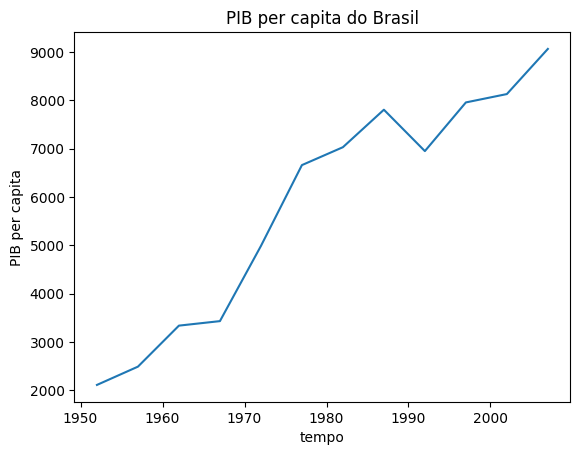

In [17]:
#capiturar a evolução do Per capta do Brasil
plt.plot(df.index, df['gdpPercap']) #pegando dados do percapta
plt.title('PIB per capita do Brasil') #titulo
plt.ylabel('PIB per capita') #eixo y
plt.xlabel('tempo'); #eixo x


In [12]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


C:\Users\socor\AppData\Local\Temp\ipykernel_1916\2765906300.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['lifeExp'], df['gdpPercap'], cmap= 'viridis') # o que vai no eixo x , eixo y, e colormap =cmap


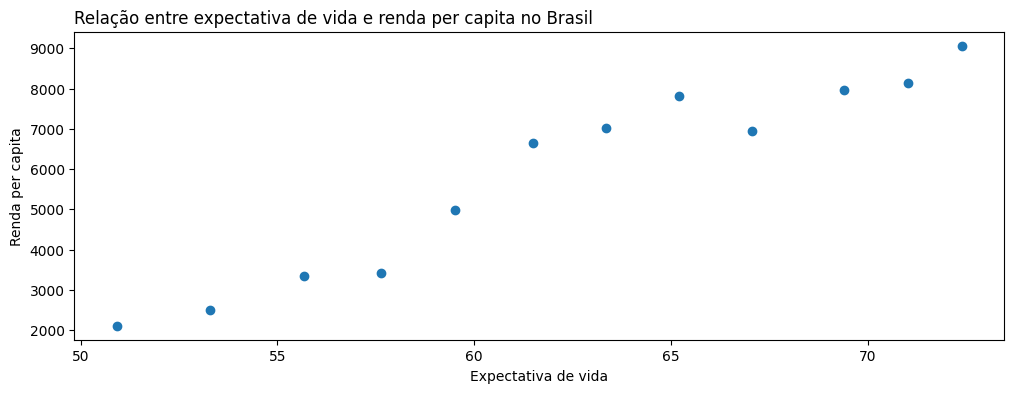

In [25]:
#ver a relação entre espectativa de vida e vida percapta

title = "Relação entre expectativa de vida e renda per capita no Brasil"

plt.figure(figsize=(12, 4)) #tamanho da figura
plt.scatter(df['lifeExp'], df['gdpPercap'], cmap= 'viridis') # o que vai no eixo x , eixo y, e colormap =cmap
plt.xlabel("Expectativa de vida") #Eixo x
plt.ylabel("Renda per capita")#eixo y
plt.title(title, loc = 'left') #titulo e local do titulo
plt.show() #finaliza o grafico

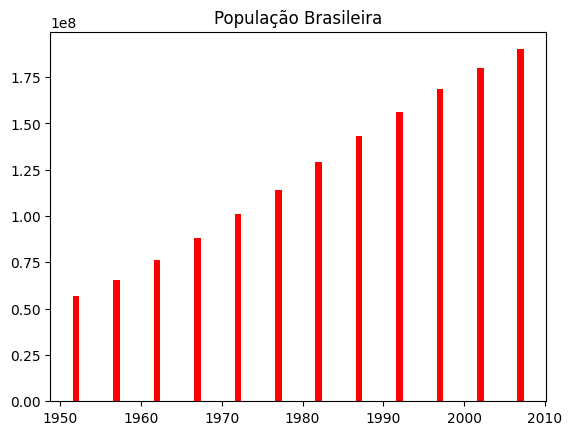

In [26]:
#Grafico de Barras
plt.bar(x = df.index, height = df['pop'], color = 'red') #passa o eixo, altura da barra e cor
plt.title("População Brasileira"); #titulo

In [27]:
#função para filtrar continentes 

def filtar_continente(continente):
    df = px.data.gapminder() # recebe o dataset gapminder
    df = df[df['continent'] == continente] #filtrar por continente
    return df

In [28]:
#função para filtrar paises
def filtar_pais(pais, variavel):
    #Filtra  algum país da amostra para as variaveis "pop", "gdpPercap" e "LifeExp"
    df = px.data.gapminder() # recebe o dataset gapminder
    df = df[df['country'] == pais][variavel] # filtrar um pais para alguma variavel da dataset
    return df 

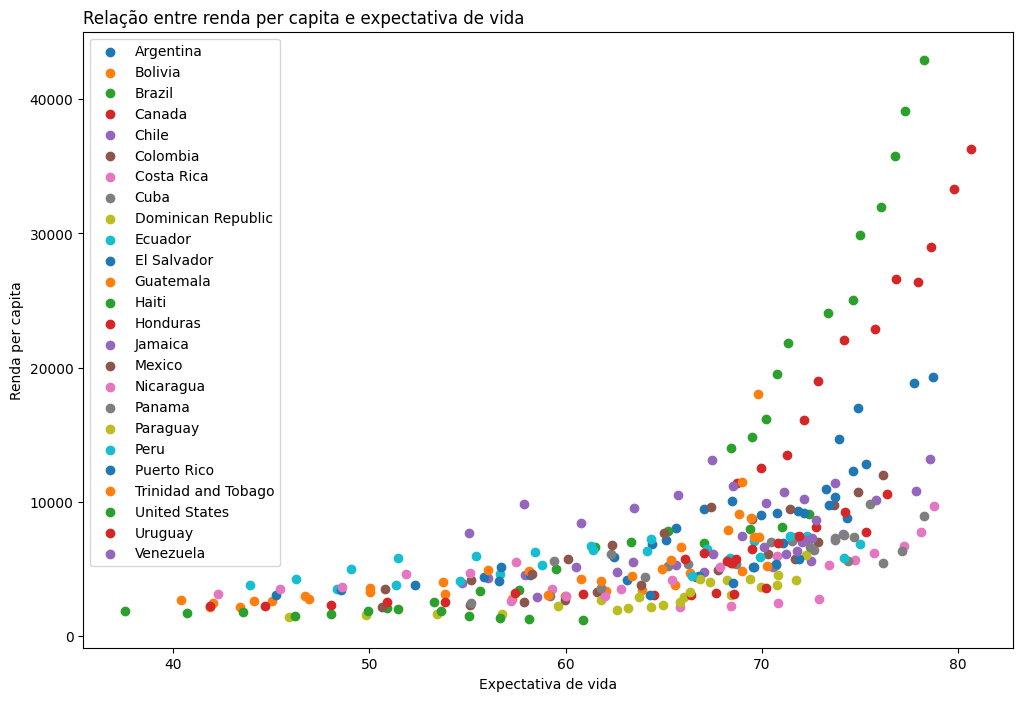

In [44]:
americas = filtar_continente('Americas') #filtrar continente para americas
paises = americas['country'].unique() #pegar a coluna paises das americas
plt.figure(figsize = (12, 8)) # tamanho da figura
for pais in paises: #estrutura de repetição para passar por cada pais
    # #filtra ps paises e primeiro coloca a expectativa de vida, depois filtra por renda per capta
    plt.scatter(filtar_pais(pais = pais, variavel = 'lifeExp'), filtar_pais(pais=pais, variavel = 'gdpPercap'))
plt.legend(labels = paises, loc = 'best') #legenda dos paises e rotulo da figura
plt.title("Relação entre renda per capita e expectativa de vida", loc = 'left') #titulo do pais
plt.xlabel("Expectativa de vida") #eixo x com titulo
plt.ylabel("Renda per capita"); #eixo y com titulo